In [17]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [18]:
features_num = 3
num = 124
window_size = 20
Train_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)
Test_dataset = np.loadtxt('trainset(2)/J0003_0024_0222_20110307012737_cell_7.csv',delimiter=",", skiprows=1)


In [19]:
scaler = MinMaxScaler()
Train_dataset = scaler.fit_transform(Train_dataset)
Test_dataset = scaler.fit_transform(Test_dataset)


In [20]:
x_train = Train_dataset[:, 0:features_num]
y_train = Train_dataset[:, 0]

x_test = Test_dataset[:, 0:features_num]
y_test = Test_dataset[:, 0]


In [21]:
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data[i:i+window_size]))
        label_list.append(np.array(label[i+window_size]))
    return np.array(feature_list), np.array(label_list)


In [22]:
train_feature, train_label = make_dataset(x_train, y_train, window_size)
test_feature, test_label = make_dataset(x_test, y_test, window_size)
x_train, x_val, y_train, y_val = train_test_split(train_feature, train_label, test_size=0.2)


In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(64,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(32,
                              activation='relu',
                              return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(32,
                              activation='relu',
                              return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3))


In [24]:
model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(lr=0.001))
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=500, mode='min')


In [25]:
filename = os.path.join('models/', 'tmp_checkpointcell7_GRU_onefeature_gw.h5')
checkpoint = tf.keras.callbacks.ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')


In [26]:
history = model.fit(x_train, y_train,
                                    epochs=500,
                                    batch_size=16,
                                    validation_data=(x_val, y_val),
                                    callbacks=[checkpoint])


Epoch 1/500
12/12 [==============================] - 4s 57ms/step - loss: 0.1774 - val_loss: 0.0188

Epoch 00001: val_loss improved from inf to 0.01879, saving model to models\tmp_checkpointcell7_GRU_onefeature_gw.h5
Epoch 2/500
12/12 [==============================] - 0s 17ms/step - loss: 0.0294 - val_loss: 0.0114

Epoch 00002: val_loss improved from 0.01879 to 0.01141, saving model to models\tmp_checkpointcell7_GRU_onefeature_gw.h5
Epoch 3/500
12/12 [==============================] - 0s 18ms/step - loss: 0.0163 - val_loss: 0.0086

Epoch 00003: val_loss improved from 0.01141 to 0.00859, saving model to models\tmp_checkpointcell7_GRU_onefeature_gw.h5
Epoch 4/500
12/12 [==============================] - 0s 15ms/step - loss: 0.0062 - val_loss: 0.0021

Epoch 00004: val_loss improved from 0.00859 to 0.00207, saving model to models\tmp_checkpointcell7_GRU_onefeature_gw.h5
Epoch 5/500
12/12 [==============================] - 0s 16ms/step - loss: 0.0030 - val_loss: 0.0018

Epoch 00005: val_lo

12/12 [==============================] - 0s 15ms/step - loss: 1.0137e-04 - val_loss: 8.6976e-05

Epoch 00042: val_loss did not improve from 0.00008
Epoch 43/500
12/12 [==============================] - 0s 16ms/step - loss: 1.5030e-04 - val_loss: 1.7729e-04

Epoch 00043: val_loss did not improve from 0.00008
Epoch 44/500
12/12 [==============================] - 0s 16ms/step - loss: 1.4259e-04 - val_loss: 1.6966e-04

Epoch 00044: val_loss did not improve from 0.00008
Epoch 45/500
12/12 [==============================] - 0s 16ms/step - loss: 1.5503e-04 - val_loss: 1.1226e-04

Epoch 00045: val_loss did not improve from 0.00008
Epoch 46/500
12/12 [==============================] - 0s 16ms/step - loss: 1.2697e-04 - val_loss: 1.0264e-04

Epoch 00046: val_loss did not improve from 0.00008
Epoch 47/500
12/12 [==============================] - 0s 16ms/step - loss: 1.2025e-04 - val_loss: 8.5300e-05

Epoch 00047: val_loss did not improve from 0.00008
Epoch 48/500
12/12 [===========================

12/12 [==============================] - 0s 17ms/step - loss: 1.3852e-04 - val_loss: 5.9684e-05

Epoch 00090: val_loss did not improve from 0.00006
Epoch 91/500
12/12 [==============================] - 0s 16ms/step - loss: 7.6744e-05 - val_loss: 7.7959e-05

Epoch 00091: val_loss did not improve from 0.00006
Epoch 92/500
12/12 [==============================] - 0s 15ms/step - loss: 1.0283e-04 - val_loss: 6.0697e-05

Epoch 00092: val_loss did not improve from 0.00006
Epoch 93/500
12/12 [==============================] - 0s 15ms/step - loss: 9.0236e-05 - val_loss: 5.8448e-05

Epoch 00093: val_loss improved from 0.00006 to 0.00006, saving model to models\tmp_checkpointcell7_GRU_onefeature_gw.h5
Epoch 94/500
12/12 [==============================] - 0s 16ms/step - loss: 7.7088e-05 - val_loss: 1.3984e-04

Epoch 00094: val_loss did not improve from 0.00006
Epoch 95/500
12/12 [==============================] - 0s 16ms/step - loss: 1.2263e-04 - val_loss: 8.2580e-05

Epoch 00095: val_loss did not

12/12 [==============================] - 0s 17ms/step - loss: 2.0313e-04 - val_loss: 1.0221e-04

Epoch 00139: val_loss did not improve from 0.00005
Epoch 140/500
12/12 [==============================] - 0s 17ms/step - loss: 1.2575e-04 - val_loss: 7.7505e-05

Epoch 00140: val_loss did not improve from 0.00005
Epoch 141/500
12/12 [==============================] - 0s 16ms/step - loss: 1.7990e-04 - val_loss: 7.1781e-05

Epoch 00141: val_loss did not improve from 0.00005
Epoch 142/500
12/12 [==============================] - 0s 16ms/step - loss: 1.4585e-04 - val_loss: 5.5868e-05

Epoch 00142: val_loss did not improve from 0.00005
Epoch 143/500
12/12 [==============================] - 0s 15ms/step - loss: 7.9594e-05 - val_loss: 9.6866e-05

Epoch 00143: val_loss did not improve from 0.00005
Epoch 144/500
12/12 [==============================] - 0s 16ms/step - loss: 1.1023e-04 - val_loss: 1.1202e-04

Epoch 00144: val_loss did not improve from 0.00005
Epoch 145/500
12/12 [=====================

12/12 [==============================] - 0s 16ms/step - loss: 1.6980e-04 - val_loss: 6.3303e-05

Epoch 00188: val_loss did not improve from 0.00004
Epoch 189/500
12/12 [==============================] - 0s 16ms/step - loss: 1.2636e-04 - val_loss: 6.3408e-05

Epoch 00189: val_loss did not improve from 0.00004
Epoch 190/500
12/12 [==============================] - 0s 16ms/step - loss: 2.2979e-04 - val_loss: 1.6225e-04

Epoch 00190: val_loss did not improve from 0.00004
Epoch 191/500
12/12 [==============================] - 0s 16ms/step - loss: 1.8996e-04 - val_loss: 1.1194e-04

Epoch 00191: val_loss did not improve from 0.00004
Epoch 192/500
12/12 [==============================] - 0s 16ms/step - loss: 1.0541e-04 - val_loss: 6.6294e-05

Epoch 00192: val_loss did not improve from 0.00004
Epoch 193/500
12/12 [==============================] - 0s 16ms/step - loss: 6.9137e-05 - val_loss: 4.3962e-05

Epoch 00193: val_loss did not improve from 0.00004
Epoch 194/500
12/12 [=====================

12/12 [==============================] - 0s 16ms/step - loss: 9.4187e-05 - val_loss: 5.7319e-05

Epoch 00238: val_loss did not improve from 0.00004
Epoch 239/500
12/12 [==============================] - 0s 16ms/step - loss: 8.9957e-05 - val_loss: 6.8978e-05

Epoch 00239: val_loss did not improve from 0.00004
Epoch 240/500
12/12 [==============================] - 0s 16ms/step - loss: 6.5820e-05 - val_loss: 4.2958e-05

Epoch 00240: val_loss did not improve from 0.00004
Epoch 241/500
12/12 [==============================] - ETA: 0s - loss: 5.2713e-0 - 0s 17ms/step - loss: 5.3779e-05 - val_loss: 6.5381e-05

Epoch 00241: val_loss did not improve from 0.00004
Epoch 242/500
12/12 [==============================] - 0s 16ms/step - loss: 8.3503e-05 - val_loss: 5.7179e-05

Epoch 00242: val_loss did not improve from 0.00004
Epoch 243/500
12/12 [==============================] - 0s 16ms/step - loss: 1.1050e-04 - val_loss: 6.4229e-05

Epoch 00243: val_loss did not improve from 0.00004
Epoch 244/500


12/12 [==============================] - 0s 16ms/step - loss: 8.6126e-05 - val_loss: 2.1771e-04

Epoch 00288: val_loss did not improve from 0.00004
Epoch 289/500
12/12 [==============================] - 0s 15ms/step - loss: 1.9878e-04 - val_loss: 1.6011e-04

Epoch 00289: val_loss did not improve from 0.00004
Epoch 290/500
12/12 [==============================] - 0s 16ms/step - loss: 1.7821e-04 - val_loss: 9.3622e-05

Epoch 00290: val_loss did not improve from 0.00004
Epoch 291/500
12/12 [==============================] - 0s 15ms/step - loss: 1.0108e-04 - val_loss: 9.4605e-05

Epoch 00291: val_loss did not improve from 0.00004
Epoch 292/500
12/12 [==============================] - 0s 15ms/step - loss: 6.5647e-05 - val_loss: 6.6231e-05

Epoch 00292: val_loss did not improve from 0.00004
Epoch 293/500
12/12 [==============================] - 0s 16ms/step - loss: 6.3141e-05 - val_loss: 5.6940e-05

Epoch 00293: val_loss did not improve from 0.00004
Epoch 294/500
12/12 [=====================


Epoch 00338: val_loss did not improve from 0.00004
Epoch 339/500
12/12 [==============================] - 0s 16ms/step - loss: 9.5403e-05 - val_loss: 7.2997e-05

Epoch 00339: val_loss did not improve from 0.00004
Epoch 340/500
12/12 [==============================] - 0s 16ms/step - loss: 7.2779e-05 - val_loss: 5.6065e-05

Epoch 00340: val_loss did not improve from 0.00004
Epoch 341/500
12/12 [==============================] - 0s 16ms/step - loss: 4.0134e-05 - val_loss: 4.4507e-05

Epoch 00341: val_loss did not improve from 0.00004
Epoch 342/500
12/12 [==============================] - 0s 15ms/step - loss: 6.7496e-05 - val_loss: 8.1670e-05

Epoch 00342: val_loss did not improve from 0.00004
Epoch 343/500
12/12 [==============================] - 0s 15ms/step - loss: 7.7091e-05 - val_loss: 5.5969e-05

Epoch 00343: val_loss did not improve from 0.00004
Epoch 344/500
12/12 [==============================] - 0s 16ms/step - loss: 4.0244e-05 - val_loss: 5.5642e-05

Epoch 00344: val_loss did n

12/12 [==============================] - 0s 16ms/step - loss: 1.6619e-04 - val_loss: 6.6822e-05

Epoch 00389: val_loss did not improve from 0.00003
Epoch 390/500
12/12 [==============================] - 0s 15ms/step - loss: 8.1673e-05 - val_loss: 1.0399e-04

Epoch 00390: val_loss did not improve from 0.00003
Epoch 391/500
12/12 [==============================] - 0s 16ms/step - loss: 9.8269e-05 - val_loss: 5.1488e-05

Epoch 00391: val_loss did not improve from 0.00003
Epoch 392/500
12/12 [==============================] - 0s 16ms/step - loss: 5.9509e-05 - val_loss: 6.0988e-05

Epoch 00392: val_loss did not improve from 0.00003
Epoch 393/500
12/12 [==============================] - 0s 16ms/step - loss: 5.6485e-05 - val_loss: 4.1247e-05

Epoch 00393: val_loss did not improve from 0.00003
Epoch 394/500
12/12 [==============================] - 0s 15ms/step - loss: 5.7416e-05 - val_loss: 3.4923e-05

Epoch 00394: val_loss did not improve from 0.00003
Epoch 395/500
12/12 [=====================

12/12 [==============================] - 0s 16ms/step - loss: 6.0522e-05 - val_loss: 5.4334e-05

Epoch 00439: val_loss did not improve from 0.00003
Epoch 440/500
12/12 [==============================] - 0s 17ms/step - loss: 6.4622e-05 - val_loss: 5.3653e-05

Epoch 00440: val_loss did not improve from 0.00003
Epoch 441/500
12/12 [==============================] - 0s 17ms/step - loss: 5.3081e-05 - val_loss: 6.0361e-05

Epoch 00441: val_loss did not improve from 0.00003
Epoch 442/500
12/12 [==============================] - 0s 17ms/step - loss: 4.1693e-05 - val_loss: 3.9259e-05

Epoch 00442: val_loss did not improve from 0.00003
Epoch 443/500
12/12 [==============================] - 0s 16ms/step - loss: 4.9587e-05 - val_loss: 1.5558e-04

Epoch 00443: val_loss did not improve from 0.00003
Epoch 444/500
12/12 [==============================] - 0s 16ms/step - loss: 1.0735e-04 - val_loss: 7.5740e-05

Epoch 00444: val_loss did not improve from 0.00003
Epoch 445/500
12/12 [=====================

12/12 [==============================] - 0s 16ms/step - loss: 4.6361e-05 - val_loss: 4.1261e-05

Epoch 00489: val_loss did not improve from 0.00003
Epoch 490/500
12/12 [==============================] - 0s 16ms/step - loss: 5.3790e-05 - val_loss: 5.4676e-05

Epoch 00490: val_loss did not improve from 0.00003
Epoch 491/500
12/12 [==============================] - 0s 21ms/step - loss: 4.9330e-05 - val_loss: 4.6185e-05

Epoch 00491: val_loss did not improve from 0.00003
Epoch 492/500
12/12 [==============================] - 0s 17ms/step - loss: 6.5405e-05 - val_loss: 5.4315e-05

Epoch 00492: val_loss did not improve from 0.00003
Epoch 493/500
12/12 [==============================] - 0s 17ms/step - loss: 8.3122e-05 - val_loss: 1.1850e-04

Epoch 00493: val_loss did not improve from 0.00003
Epoch 494/500
12/12 [==============================] - 0s 16ms/step - loss: 2.1904e-04 - val_loss: 7.1875e-05

Epoch 00494: val_loss did not improve from 0.00003
Epoch 495/500
12/12 [=====================

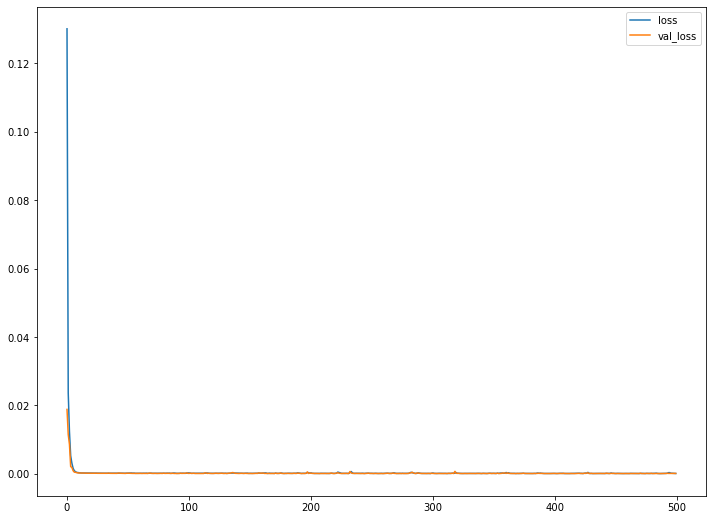

In [33]:
plt.figure(figsize=(12, 9))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [43]:
model.load_weights(filename)
pred_label = 46
pred_feature = 40
pred_test_feature = test_feature[-pred_label:-(pred_label-pred_feature)]
pred_test_label = test_label[-pred_label:]
look_ahead = 46
xhat = pred_test_feature[0]
print(xhat.shape)
preds = np.zeros((look_ahead,3))
for i in range(look_ahead):
    pred = model.predict(np.array([xhat]), batch_size=16)
    preds[i] = pred
    xhat=np.vstack([xhat[1:],pred])


(20, 3)


In [44]:
print("predict:\n", preds)
print(preds.shape)


predict:
 [[0.5939697  0.59503812 0.59502208]
 [0.60104328 0.6022737  0.60235834]
 [0.60834521 0.60997576 0.61017919]
 [0.6171416  0.61928922 0.61973464]
 [0.6273821  0.63011098 0.63093466]
 [0.63746136 0.6407792  0.64209449]
 [0.64882022 0.65266269 0.65458274]
 [0.66149729 0.66575682 0.66838771]
 [0.67543823 0.68007511 0.68341583]
 [0.69047451 0.69548494 0.69947129]
 [0.70646065 0.71183205 0.71640283]
 [0.72322494 0.7289716  0.73403436]
 [0.74072373 0.74686974 0.75231957]
 [0.75911748 0.76569331 0.77145755]
 [0.77875453 0.78587174 0.79188782]
 [0.80002338 0.80774063 0.81393826]
 [0.8228848  0.83127004 0.83753693]
 [0.84548301 0.8544746  0.8607524 ]
 [0.86655474 0.87631685 0.88238829]
 [0.88418174 0.89467525 0.90047848]
 [0.89840031 0.90911251 0.91497982]
 [0.91777122 0.92908311 0.93490249]
 [0.93796557 0.94992203 0.95565248]
 [0.95884222 0.97148043 0.97707951]
 [0.98049176 0.9938454  0.99926382]
 [1.00253308 1.01664102 1.02183104]
 [1.02504992 1.03994226 1.04485917]
 [1.04766679 1.063

In [45]:
testScore = model.evaluate(test_feature, test_label, batch_size=16, verbose=0)
model.reset_states()
print('Test Score:', testScore)


Test Score: 3.047382961085532e-05


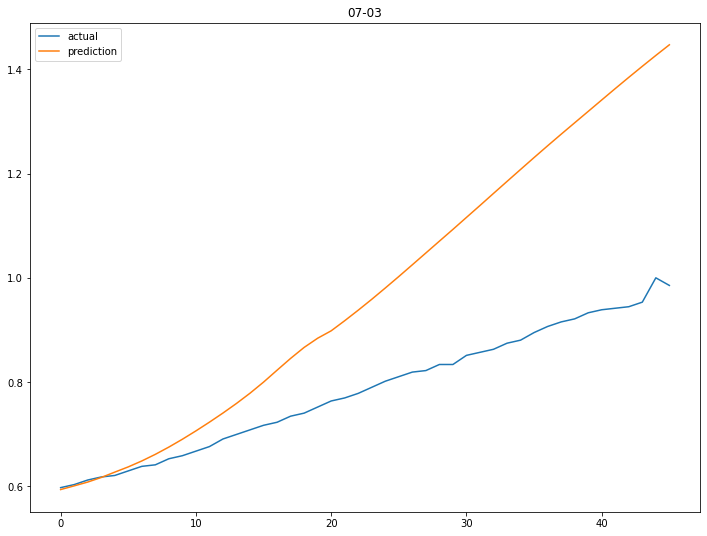

In [47]:
plt.figure(figsize=(12, 9))
plt.plot(pred_test_label, label='actual')
plt.plot(preds[:,0], label='prediction')
# plt.plot(np.arange(look_ahead),preds,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="actual")
plt.title('07-03')
# plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()


[0.31  0.309 0.31  0.309 0.31  0.311 0.312 0.313 0.312 0.311 0.311 0.311
 0.312 0.312 0.312 0.311 0.312 0.313 0.314 0.315 0.314 0.314 0.315 0.314
 0.313 0.312 0.312 0.311 0.312 0.312 0.312 0.312 0.312 0.311 0.311 0.31
 0.31  0.312 0.314 0.314 0.315 0.316 0.316 0.315 0.318 0.316]
(20, 3)


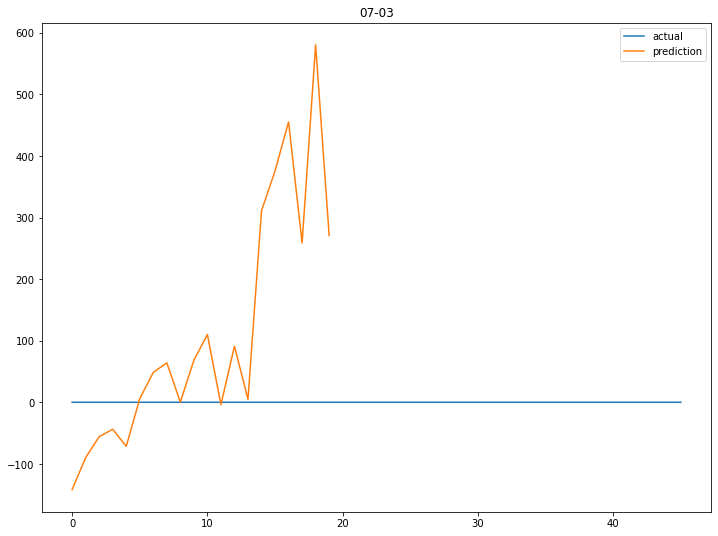

In [57]:
Test_dataset2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_03.csv',delimiter=",", skiprows=1)
x_test2 = Test_dataset2[:, 0:features_num]
y_test2 = Test_dataset2[:, 0]
test_feature2, test_label2 = make_dataset(x_test2, y_test2, window_size)

pred_test_feature2 = test_feature2[-pred_label:-(pred_label-pred_feature)]
pred_test_label2 = test_label2[-pred_label:]
print(pred_test_label2)

xhat = pred_test_feature2[0]
print(xhat.shape)
preds = np.zeros((look_ahead,3))
for i in range(look_ahead):
    pred = model.predict(np.array([xhat]), batch_size=16)
    preds[i] = pred
    xhat=np.vstack([xhat[1:],pred])
    

plt.figure(figsize=(12, 9))
plt.plot(pred_test_label2, label='actual')
plt.plot(preds[:,0], label='prediction')
# plt.plot(np.arange(look_ahead),preds,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="actual")
plt.title('07-03')
# plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

[0.592 0.593 0.595 0.595 0.596 0.599 0.6   0.601 0.601 0.602 0.604 0.607
 0.61  0.612 0.614 0.615 0.616 0.616 0.617 0.618 0.62  0.621 0.623 0.625
 0.626 0.629 0.631 0.633 0.633 0.634 0.636 0.638 0.639 0.64  0.638 0.641
 0.643 0.644 0.645 0.647 0.648 0.646 0.649 0.65  0.655 0.657]
(20, 3)


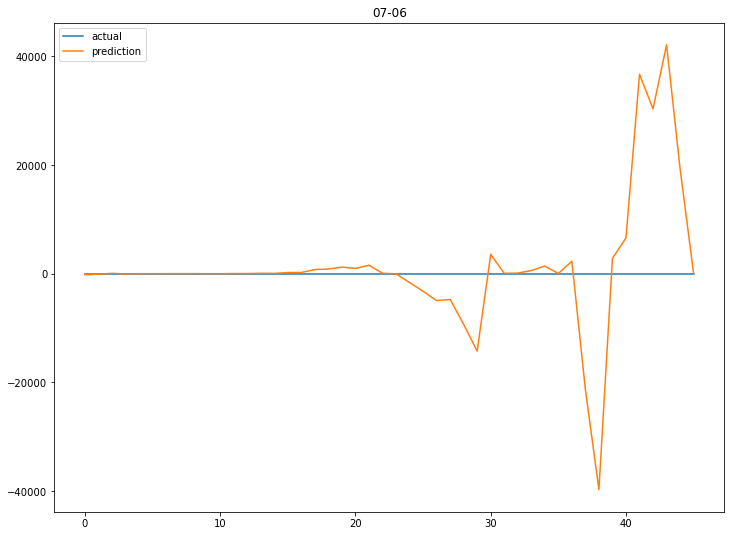

In [58]:
Test_dataset2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_06.csv',delimiter=",", skiprows=1)
x_test2 = Test_dataset2[:, 1:(features_num+1)]
y_test2 = Test_dataset2[:, 1]
test_feature2, test_label2 = make_dataset(x_test2, y_test2, window_size)

pred_test_feature2 = test_feature2[-pred_label:-(pred_label-pred_feature)]
pred_test_label2 = test_label2[-pred_label:]
print(pred_test_label2)

xhat = pred_test_feature2[0]
print(xhat.shape)
preds = np.zeros((look_ahead,3))
for i in range(look_ahead):
    pred = model.predict(np.array([xhat]), batch_size=16)
    preds[i] = pred
    xhat=np.vstack([xhat[1:],pred])
    

plt.figure(figsize=(12, 9))
plt.plot(pred_test_label2, label='actual')
plt.plot(preds[:,0], label='prediction')
# plt.plot(np.arange(look_ahead),preds,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="actual")
plt.title('07-06')
# plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

[0.565 0.566 0.569 0.571 0.573 0.578 0.581 0.583 0.585 0.588 0.593 0.597
 0.601 0.603 0.607 0.608 0.608 0.612 0.617 0.619 0.621 0.626 0.63  0.633
 0.637 0.638 0.642 0.645 0.647 0.649 0.652 0.653 0.658 0.661 0.663 0.666
 0.668 0.671 0.671 0.674 0.675 0.678 0.68  0.682 0.697 0.691]
(20, 3)


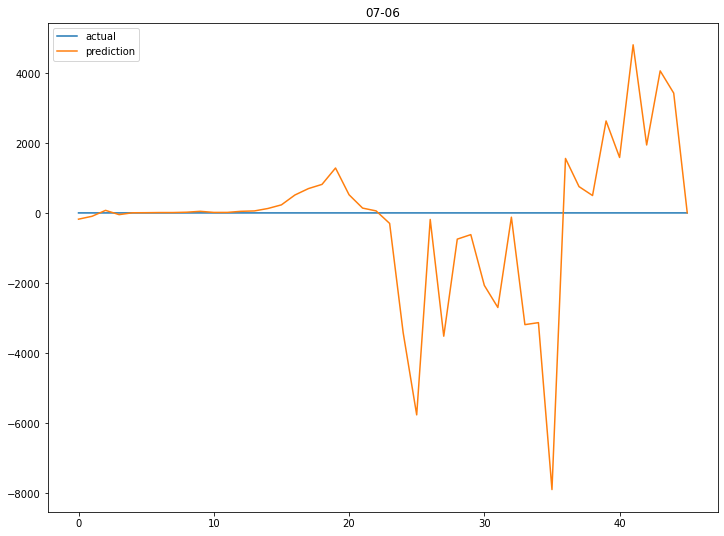

In [59]:
Test_dataset2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_7.csv',delimiter=",", skiprows=1)
x_test2 = Test_dataset2[:, 1:(features_num+1)]
y_test2 = Test_dataset2[:, 1]
test_feature2, test_label2 = make_dataset(x_test2, y_test2, window_size)

pred_test_feature2 = test_feature2[-pred_label:-(pred_label-pred_feature)]
pred_test_label2 = test_label2[-pred_label:]
print(pred_test_label2)

xhat = pred_test_feature2[0]
print(xhat.shape)
preds = np.zeros((look_ahead,3))
for i in range(look_ahead):
    pred = model.predict(np.array([xhat]), batch_size=16)
    preds[i] = pred
    xhat=np.vstack([xhat[1:],pred])
    

plt.figure(figsize=(12, 9))
plt.plot(pred_test_label2, label='actual')
plt.plot(preds[:,0], label='prediction')
# plt.plot(np.arange(look_ahead),preds,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="actual")
plt.title('07-06')
# plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

[0.21  0.211 0.211 0.211 0.21  0.21  0.21  0.209 0.21  0.209 0.211 0.211
 0.213 0.214 0.214 0.214 0.214 0.214 0.213 0.214 0.214 0.213 0.212 0.212
 0.214 0.214 0.212 0.212 0.213 0.213 0.213 0.214 0.213 0.213 0.214 0.213
 0.215 0.214 0.214 0.213 0.213 0.214 0.214 0.213 0.214 0.215]
(20, 3)


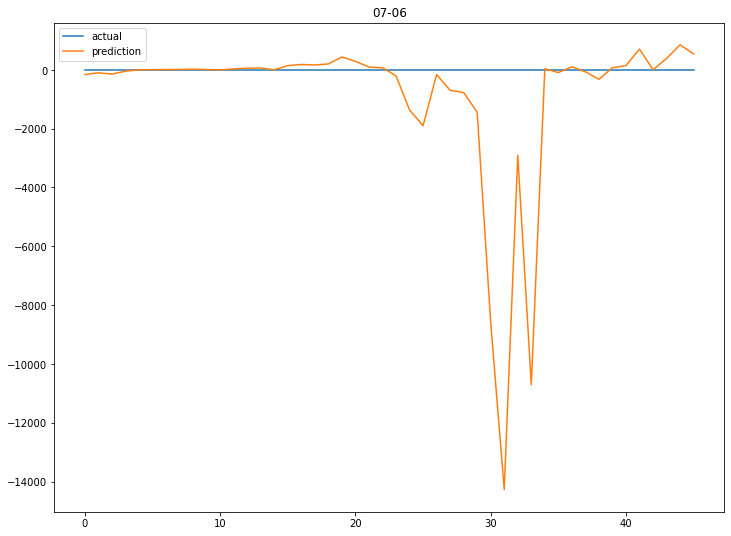

In [60]:
Test_dataset2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_9.csv',delimiter=",", skiprows=1)
x_test2 = Test_dataset2[:, 1:(features_num+1)]
y_test2 = Test_dataset2[:, 1]
test_feature2, test_label2 = make_dataset(x_test2, y_test2, window_size)

pred_test_feature2 = test_feature2[-pred_label:-(pred_label-pred_feature)]
pred_test_label2 = test_label2[-pred_label:]
print(pred_test_label2)

xhat = pred_test_feature2[0]
print(xhat.shape)
preds = np.zeros((look_ahead,3))
for i in range(look_ahead):
    pred = model.predict(np.array([xhat]), batch_size=16)
    preds[i] = pred
    xhat=np.vstack([xhat[1:],pred])
    

plt.figure(figsize=(12, 9))
plt.plot(pred_test_label2, label='actual')
plt.plot(preds[:,0], label='prediction')
# plt.plot(np.arange(look_ahead),preds,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="actual")
plt.title('07-06')
# plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()

[0.59  0.592 0.59  0.59  0.588 0.59  0.588 0.589 0.592 0.594 0.595 0.597
 0.596 0.597 0.596 0.598 0.6   0.601 0.601 0.601 0.601 0.603 0.603 0.603
 0.605 0.606 0.607 0.608 0.608 0.609 0.608 0.608 0.608 0.608 0.61  0.612
 0.614 0.615 0.615 0.616 0.614 0.616 0.616 0.617 0.618 0.622]
(20, 3)


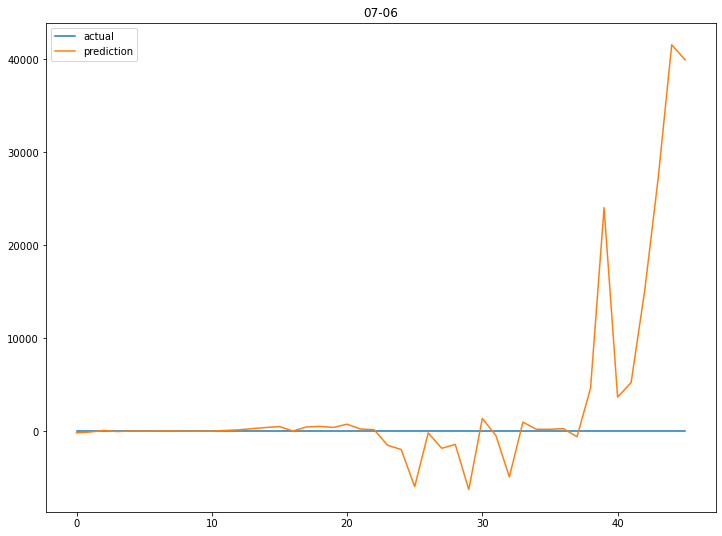

In [61]:
Test_dataset2 = np.loadtxt('testset(2)/J0003_0024_0221_20110307012732_cell_18.csv',delimiter=",", skiprows=1)
x_test2 = Test_dataset2[:, 1:(features_num+1)]
y_test2 = Test_dataset2[:, 1]
test_feature2, test_label2 = make_dataset(x_test2, y_test2, window_size)

pred_test_feature2 = test_feature2[-pred_label:-(pred_label-pred_feature)]
pred_test_label2 = test_label2[-pred_label:]
print(pred_test_label2)

xhat = pred_test_feature2[0]
print(xhat.shape)
preds = np.zeros((look_ahead,3))
for i in range(look_ahead):
    pred = model.predict(np.array([xhat]), batch_size=16)
    preds[i] = pred
    xhat=np.vstack([xhat[1:],pred])
    

plt.figure(figsize=(12, 9))
plt.plot(pred_test_label2, label='actual')
plt.plot(preds[:,0], label='prediction')
# plt.plot(np.arange(look_ahead),preds,'r',label="prediction")
# plt.plot(np.arange(look_ahead),y_test[:look_ahead],label="actual")
plt.title('07-06')
# plt.savefig('savefig/cell7/07-03.png')
plt.legend()
plt.show()